In [1]:
%config IPCompleter.greedy=True
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Preparo na base de dados
para poder usar todos os dados da melhor maneira acrecentei '_' onde havia ' ' no cabecalho do csv manualmente, formatei o formato str monetario das colunas para um formato  int64
    - hoa
    - rent_amount
    - property_tax
    - fire_insurance
    - total
tambem formatei as colunas:
    - animal
    - furniture
    - floor
apenas retirando seu formato string e transformando em informação util para analise

In [2]:
houses_df = pd.read_csv('houses_to_rent.csv')

In [3]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
id                6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking_spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent_amount       6080 non-null object
property_tax      6080 non-null object
fire_insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [4]:
houses_df.describe()

,id,city,area,rooms,bathroom,parking_spaces
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000
max,6079.00000,1.000000,24606.000000,10.000000,10.000000,12.000000


In [5]:
houses_df.head(3)

,id,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"


Trocando strings para valores "boleanos" e casas para andar 0 o terreo

In [6]:
houses_df['furniture'] = houses_df['furniture'].str.replace('not furnished','0')
houses_df['furniture'] = houses_df['furniture'].str.replace('furnished','1')
houses_df['animal'] = houses_df['animal'].str.replace('not acept','0')
houses_df['animal'] = houses_df['animal'].str.replace('acept','1')
houses_df['floor'] = houses_df['floor'].str.replace('-','0')

retirando o R$ e ',' de milhar, trocando informações como 'Sem info' e 'Incluso' para 0

In [7]:
label = ['hoa','rent_amount','property_tax','fire_insurance','total']
for col in label:
    houses_df[col] = houses_df[col].str.replace('R','')
    houses_df[col] = houses_df[col].str.replace('$','')
    houses_df[col] = houses_df[col].str.replace(',','')
    houses_df[col] = houses_df[col].str.replace('Sem info','0')
    houses_df[col] = houses_df[col].str.replace('Incluso','0')
        

Convertendo para numeros interios

In [8]:
houses_df_refined = houses_df.astype({'floor':'int64','animal':'int64','furniture':'int64','hoa':'int64','rent_amount':'int64','property_tax':'int64','fire_insurance':'int64','total':'int64'})

### analise de dados

estas são as informaçoes sem a preparação dos dados há 5 variaves

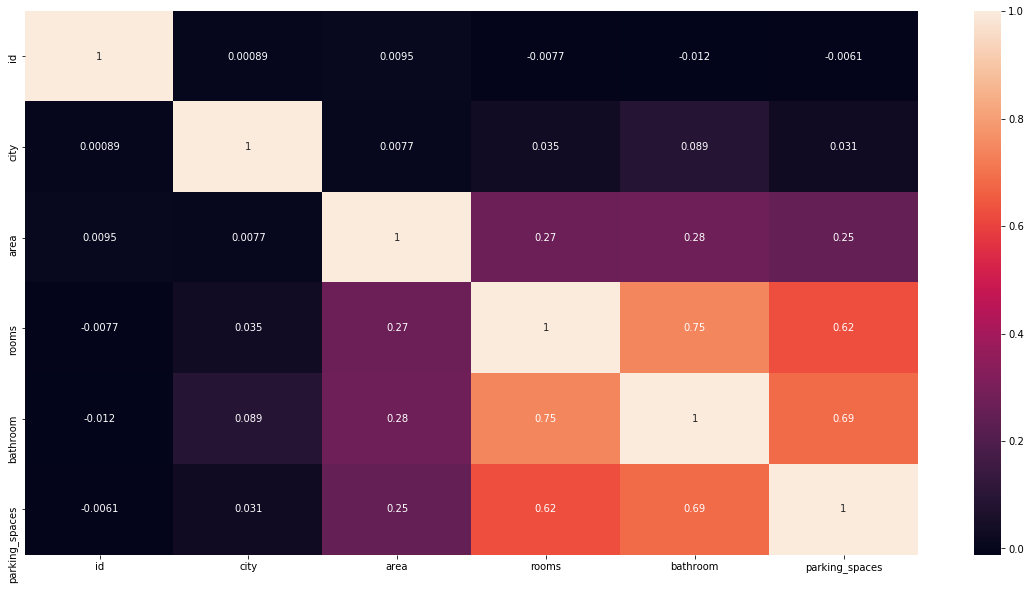

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(houses_df.corr(), annot=True);

Ja aqui temos todos os dados e vemos que há 13 variaveis agora

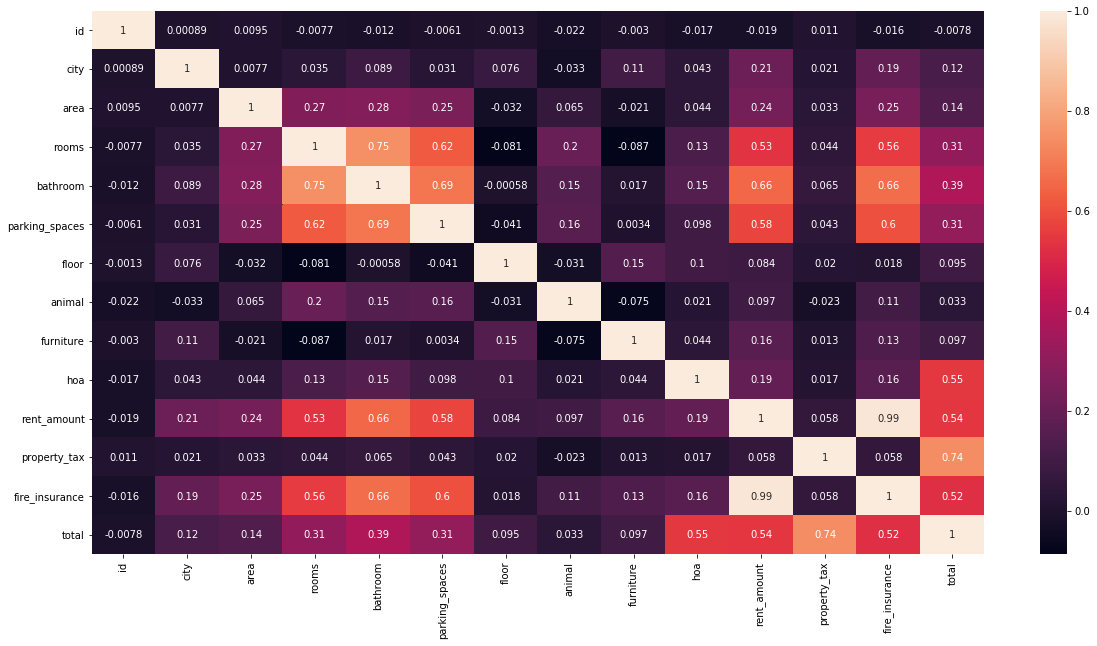

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(houses_df_refined.corr(), annot=True);

<Figure size 720x720 with 0 Axes>

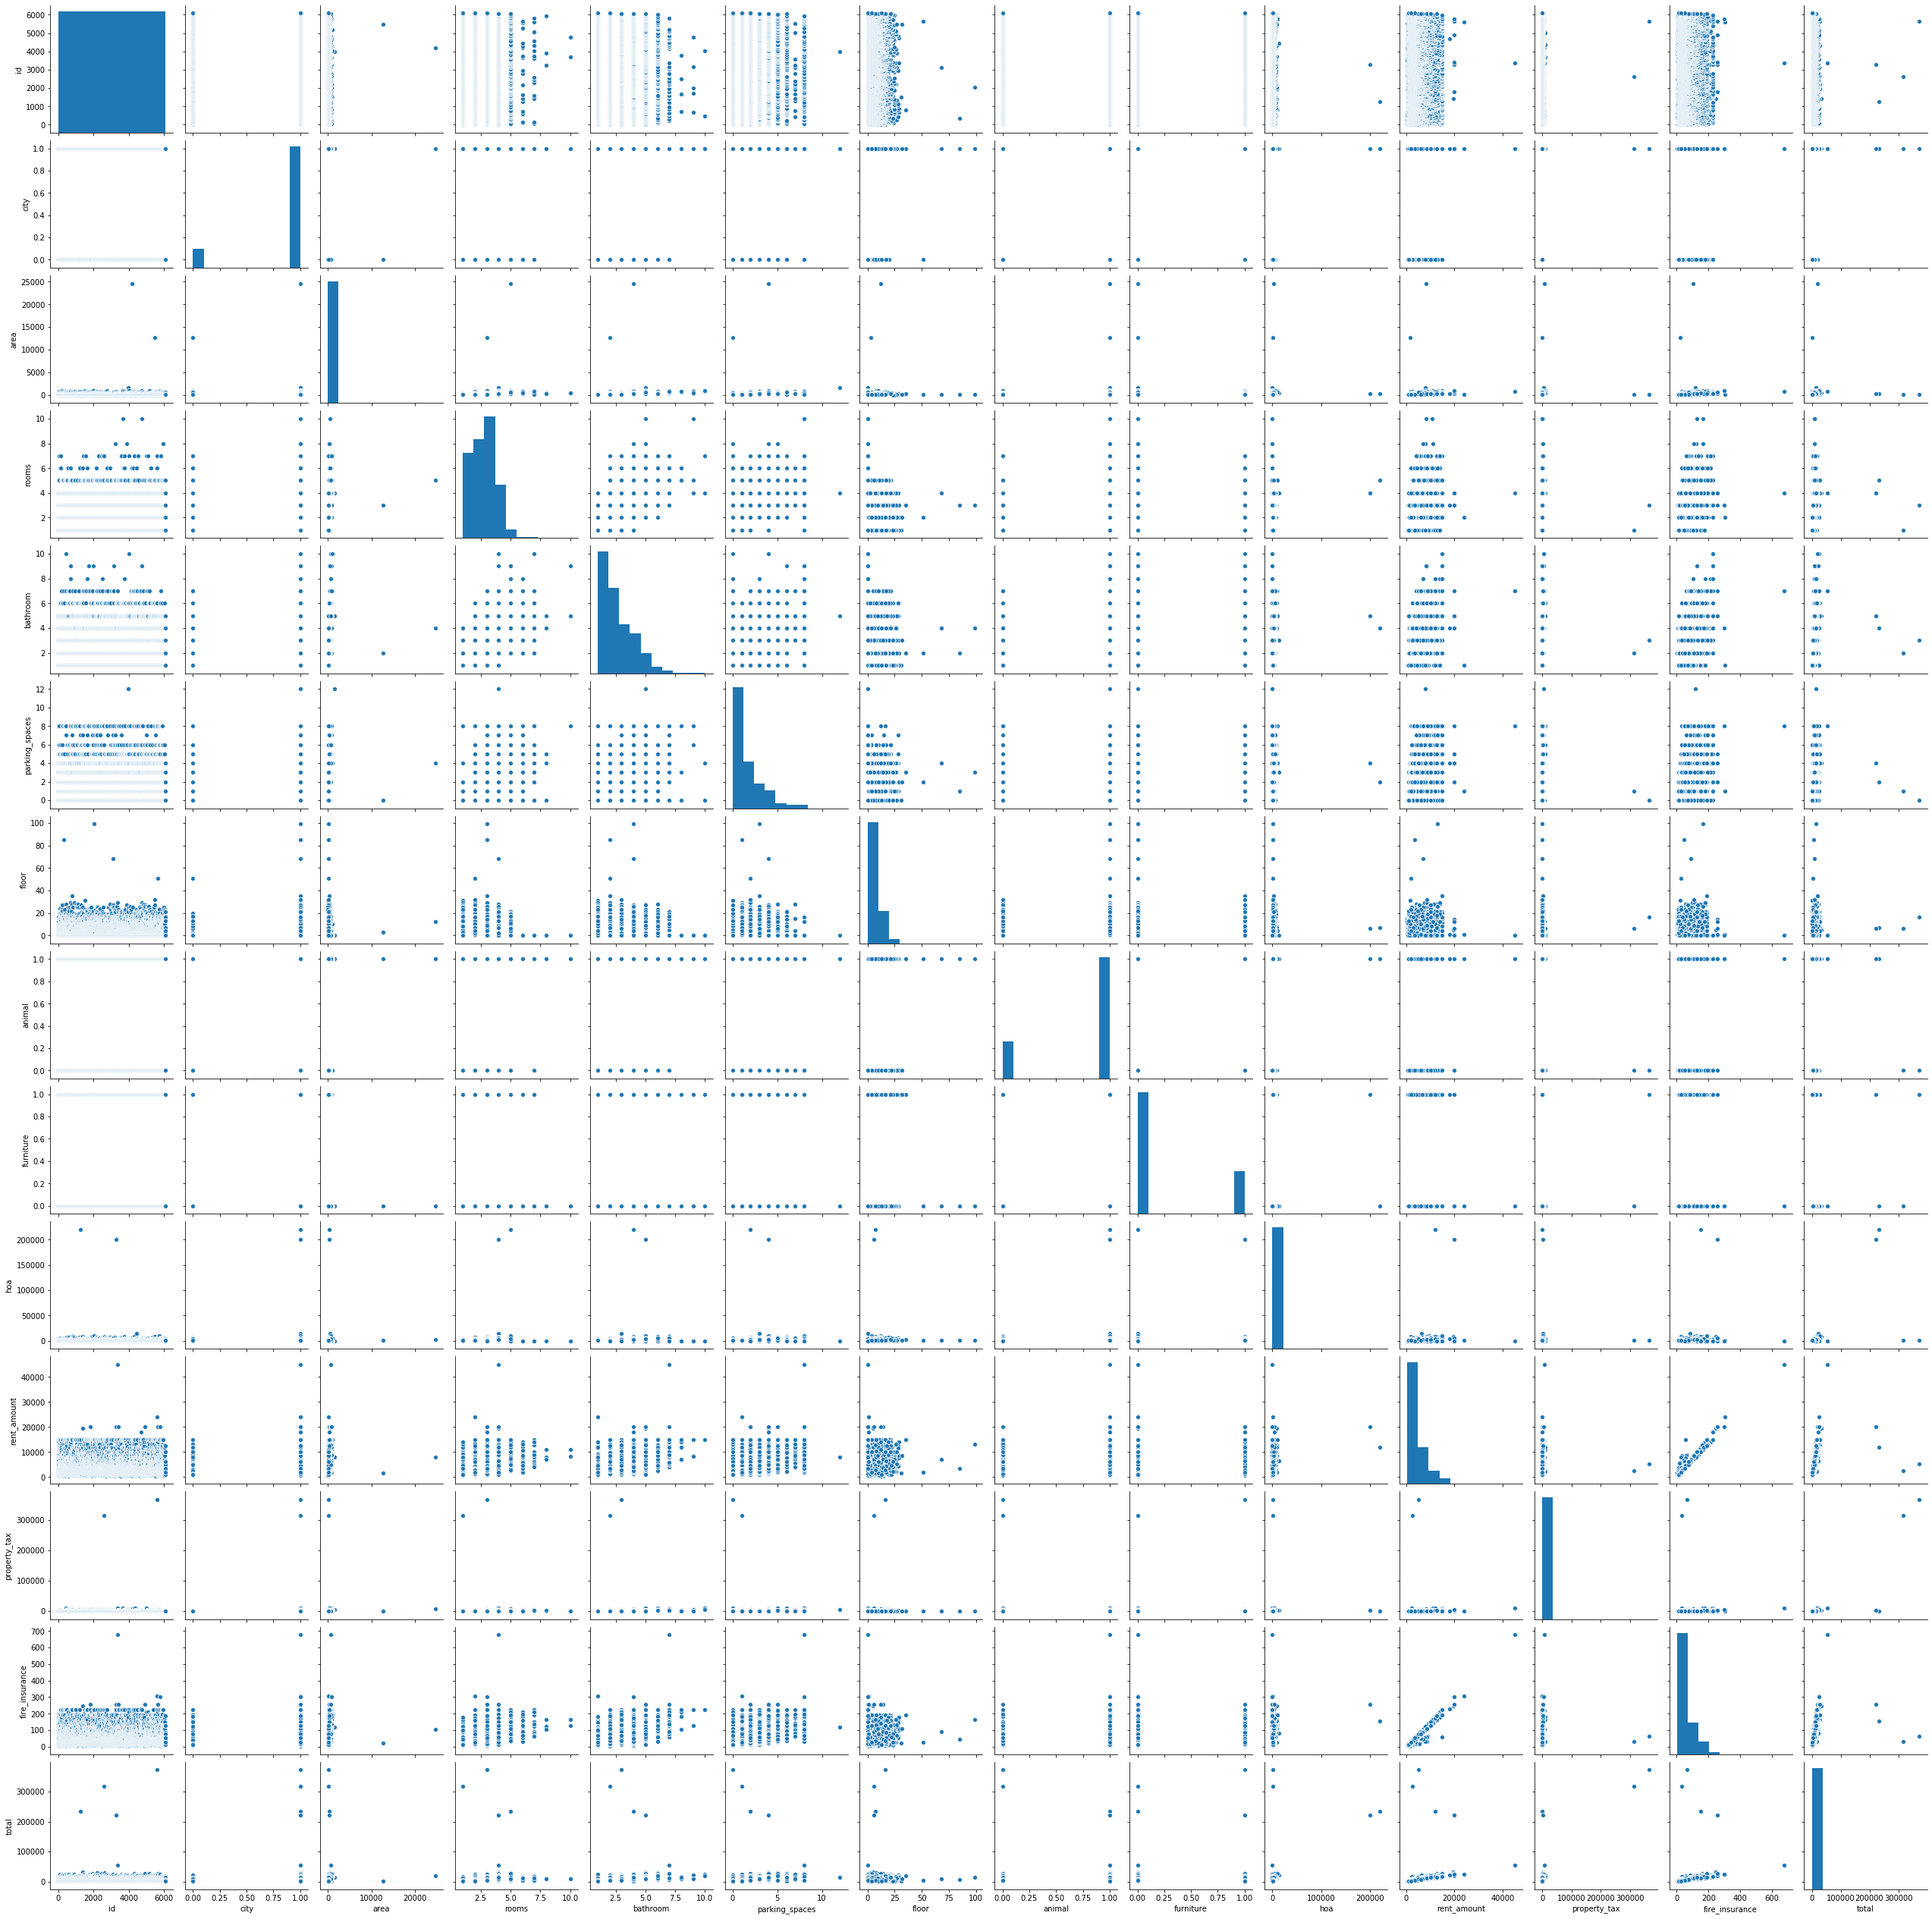

In [11]:
plt.figure(figsize=(10,10));
sns.pairplot(houses_df_refined);

### Seleção de dados para o modelo
 pelo mapa de calor podemos observar que a correlaçao entre o valor do alugel do imovel e as outras variaves podemos ultilizar:
    - city 21% de correlação
    - area 24% de correlação
    - rooms 53% de correlação
    - bathroom 66% de correlação
    - parking_spaces 58% de correlação
    - fire_insurance 99% de correlação

### Preparação dos dados para o modelo

In [11]:
relevant_data = ['city','area','rooms','bathroom','parking_spaces','fire_insurance']
x_data = houses_df_refined[relevant_data]
x_data.shape

(6080, 6)

In [12]:
y_data = houses_df_refined['rent_amount']
y_data = y_data.values.reshape(-1,1)
y_data.shape

(6080, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
y_scaled = scaler.fit_transform(y_data)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.05)
n_epochs = 150
percent_split = 0.25

In [14]:
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Dense( units = 100, activation = 'relu', input_shape = (6,) ))
modelo_1.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_1.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_1.add(tf.keras.layers.Dense( units = 1  , activation = 'linear' ))

In [15]:
modelo_1.compile( optimizer = 'Adam' , loss='mean_squared_error',metrics=['accuracy'])   
hist_1 = modelo_1.fit(x_train, y_train, epochs = n_epochs, batch_size = 35, validation_split = percent_split)

Train on 4332 samples, validate on 1444 samples
Epoch 1/150
4332/4332 [==============================] - 2s 548us/sample - loss: 0.0011 - accuracy: 2.3084e-04 - val_loss: 2.1927e-04 - val_accuracy: 0.0000e+00
Epoch 2/150
4332/4332 [==============================] - 1s 171us/sample - loss: 1.9257e-04 - accuracy: 4.6168e-04 - val_loss: 1.8292e-04 - val_accuracy: 0.0000e+00
Epoch 3/150
4332/4332 [==============================] - 1s 120us/sample - loss: 1.5743e-04 - accuracy: 4.6168e-04 - val_loss: 1.8020e-04 - val_accuracy: 0.0000e+00
Epoch 4/150
4332/4332 [==============================] - 1s 131us/sample - loss: 1.8650e-04 - accuracy: 4.6168e-04 - val_loss: 1.6398e-04 - val_accuracy: 0.0000e+00
Epoch 5/150
4332/4332 [==============================] - 1s 147us/sample - loss: 1.8347e-04 - accuracy: 4.6168e-04 - val_loss: 2.3036e-04 - val_accuracy: 0.0000e+00
Epoch 6/150
4332/4332 [==============================] - 1s 129us/sample - loss: 1.5803e-04 - accuracy: 4.6168e-04 - val_loss: 1.67

4332/4332 [==============================] - 1s 202us/sample - loss: 1.3712e-04 - accuracy: 4.6168e-04 - val_loss: 1.8257e-04 - val_accuracy: 0.0000e+00
Epoch 51/150
4332/4332 [==============================] - 1s 179us/sample - loss: 1.2407e-04 - accuracy: 4.6168e-04 - val_loss: 1.5683e-04 - val_accuracy: 0.0000e+00
Epoch 52/150
4332/4332 [==============================] - 1s 135us/sample - loss: 1.2948e-04 - accuracy: 4.6168e-04 - val_loss: 1.6003e-04 - val_accuracy: 0.0000e+00
Epoch 53/150
4332/4332 [==============================] - 1s 128us/sample - loss: 1.2567e-04 - accuracy: 4.6168e-04 - val_loss: 1.5355e-04 - val_accuracy: 0.0000e+00
Epoch 54/150
4332/4332 [==============================] - 1s 155us/sample - loss: 1.3818e-04 - accuracy: 4.6168e-04 - val_loss: 1.6114e-04 - val_accuracy: 0.0000e+00
Epoch 55/150
4332/4332 [==============================] - 1s 154us/sample - loss: 1.3296e-04 - accuracy: 4.6168e-04 - val_loss: 1.8489e-04 - val_accuracy: 0.0000e+00
Epoch 56/150
4332

4332/4332 [==============================] - 1s 144us/sample - loss: 1.2211e-04 - accuracy: 4.6168e-04 - val_loss: 1.7552e-04 - val_accuracy: 0.0000e+00
Epoch 100/150
4332/4332 [==============================] - 1s 150us/sample - loss: 1.1944e-04 - accuracy: 4.6168e-04 - val_loss: 1.5462e-04 - val_accuracy: 0.0000e+00
Epoch 101/150
4332/4332 [==============================] - 1s 128us/sample - loss: 1.2167e-04 - accuracy: 4.6168e-04 - val_loss: 1.5317e-04 - val_accuracy: 0.0000e+00
Epoch 102/150
4332/4332 [==============================] - 1s 140us/sample - loss: 1.2422e-04 - accuracy: 4.6168e-04 - val_loss: 1.4964e-04 - val_accuracy: 0.0000e+00
Epoch 103/150
4332/4332 [==============================] - 1s 124us/sample - loss: 1.2024e-04 - accuracy: 4.6168e-04 - val_loss: 1.5506e-04 - val_accuracy: 0.0000e+00
Epoch 104/150
4332/4332 [==============================] - 1s 124us/sample - loss: 1.2041e-04 - accuracy: 4.6168e-04 - val_loss: 1.5532e-04 - val_accuracy: 0.0000e+00
Epoch 105/15

4332/4332 [==============================] - 1s 245us/sample - loss: 1.1736e-04 - accuracy: 4.6168e-04 - val_loss: 1.6567e-04 - val_accuracy: 0.0000e+00
Epoch 149/150
4332/4332 [==============================] - 1s 181us/sample - loss: 1.2214e-04 - accuracy: 4.6168e-04 - val_loss: 1.6711e-04 - val_accuracy: 0.0000e+00
Epoch 150/150
4332/4332 [==============================] - 1s 170us/sample - loss: 1.1567e-04 - accuracy: 4.6168e-04 - val_loss: 1.5380e-04 - val_accuracy: 0.0000e+00


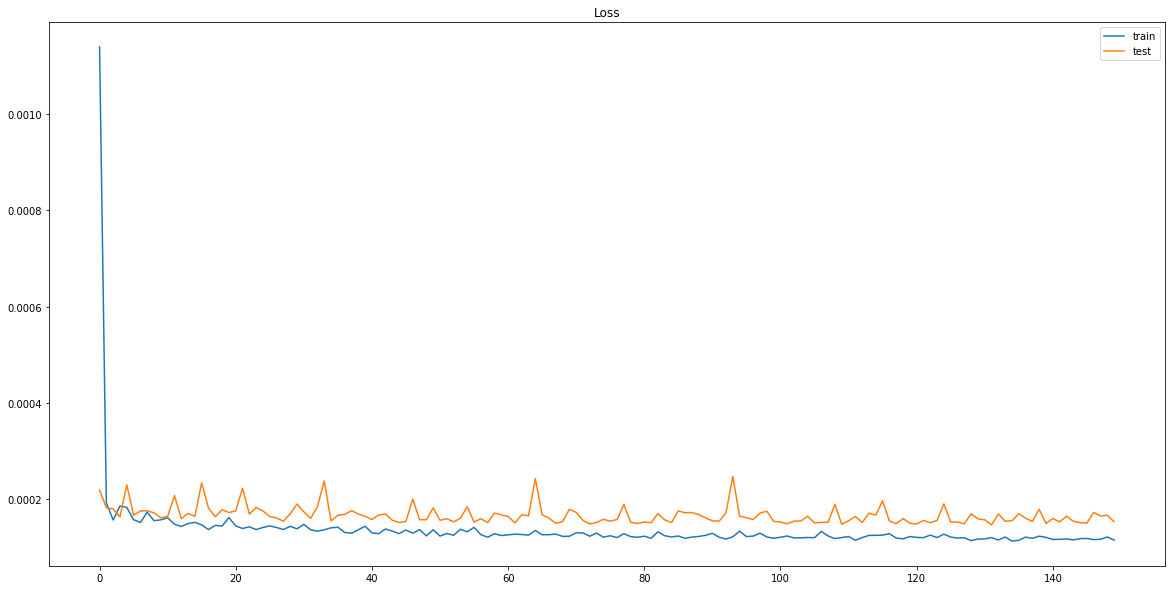

In [16]:
plt.figure(figsize=(20,10))
plt.title('Loss')
plt.plot(hist_1.history['loss'], label='train')
plt.plot(hist_1.history['val_loss'], label='test')
plt.legend();

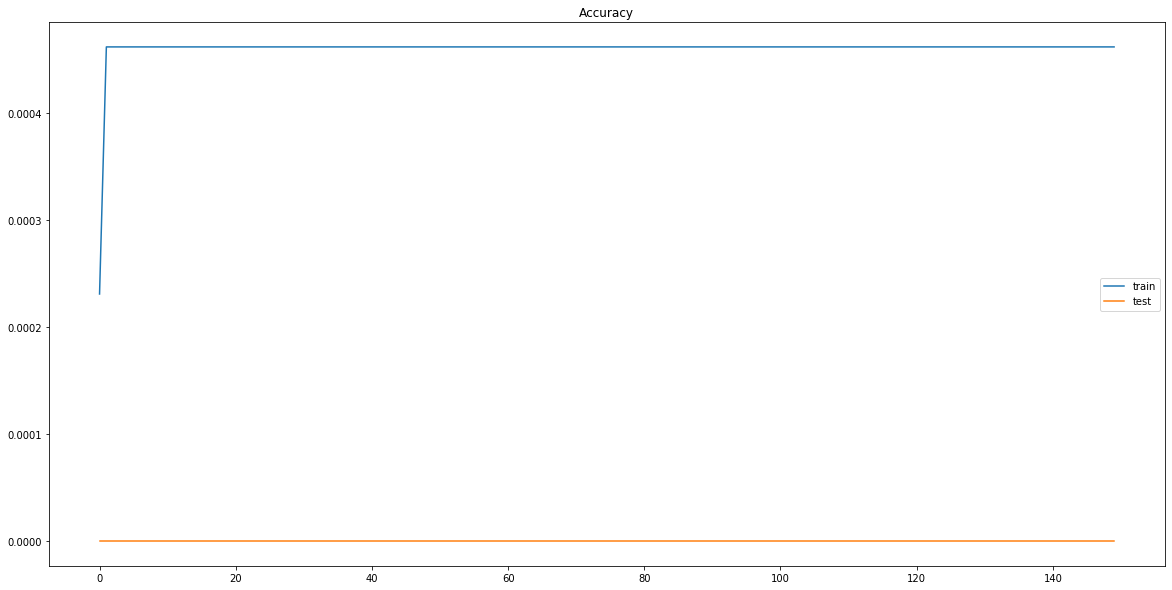

In [17]:
plt.figure(figsize=(20,10))
plt.title('Accuracy')
plt.plot(hist_1.history['accuracy'], label='train')
plt.plot(hist_1.history['val_accuracy'], label='test')
plt.legend();

In [18]:
modelo_2 = tf.keras.models.Sequential()
modelo_2.add(tf.keras.layers.Dense( units = 100, activation = 'relu', input_shape = (6,) ))
modelo_2.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_2.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_2.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_2.add(tf.keras.layers.Dense( units = 100, activation = 'relu' ))
modelo_2.add(tf.keras.layers.Dense( units = 1  , activation = 'sigmoid' ))

In [19]:
modelo_2.compile( optimizer = 'Adam' , loss='mean_squared_error',metrics=['accuracy'])   
hist_2 = modelo_2.fit(x_train, y_train, epochs = n_epochs, batch_size = 35, validation_split =percent_split)

Train on 4332 samples, validate on 1444 samples
Epoch 1/150
4332/4332 [==============================] - 2s 388us/sample - loss: 0.0219 - accuracy: 2.3084e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 2/150
4332/4332 [==============================] - 1s 155us/sample - loss: 0.0011 - accuracy: 2.3084e-04 - val_loss: 2.7409e-04 - val_accuracy: 0.0000e+00
Epoch 3/150
4332/4332 [==============================] - 1s 165us/sample - loss: 3.1132e-04 - accuracy: 2.3084e-04 - val_loss: 2.1796e-04 - val_accuracy: 0.0000e+00
Epoch 4/150
4332/4332 [==============================] - 1s 160us/sample - loss: 2.6527e-04 - accuracy: 2.3084e-04 - val_loss: 2.0602e-04 - val_accuracy: 0.0000e+00
Epoch 5/150
4332/4332 [==============================] - 1s 173us/sample - loss: 2.4233e-04 - accuracy: 2.3084e-04 - val_loss: 2.3037e-04 - val_accuracy: 0.0000e+00
Epoch 6/150
4332/4332 [==============================] - 1s 173us/sample - loss: 2.3288e-04 - accuracy: 2.3084e-04 - val_loss: 1.8301e-04 -

4332/4332 [==============================] - 1s 164us/sample - loss: 1.3265e-04 - accuracy: 4.6168e-04 - val_loss: 2.0849e-04 - val_accuracy: 0.0000e+00
Epoch 51/150
4332/4332 [==============================] - 1s 129us/sample - loss: 1.3937e-04 - accuracy: 4.6168e-04 - val_loss: 1.8056e-04 - val_accuracy: 0.0000e+00
Epoch 52/150
4332/4332 [==============================] - 1s 127us/sample - loss: 1.3104e-04 - accuracy: 4.6168e-04 - val_loss: 1.8796e-04 - val_accuracy: 0.0000e+00
Epoch 53/150
4332/4332 [==============================] - 1s 124us/sample - loss: 1.3635e-04 - accuracy: 4.6168e-04 - val_loss: 1.8500e-04 - val_accuracy: 0.0000e+00
Epoch 54/150
4332/4332 [==============================] - 1s 137us/sample - loss: 1.4260e-04 - accuracy: 4.6168e-04 - val_loss: 1.5494e-04 - val_accuracy: 0.0000e+00
Epoch 55/150
4332/4332 [==============================] - 1s 131us/sample - loss: 1.4088e-04 - accuracy: 4.6168e-04 - val_loss: 1.7575e-04 - val_accuracy: 0.0000e+00
Epoch 56/150
4332

4332/4332 [==============================] - 1s 161us/sample - loss: 1.2549e-04 - accuracy: 4.6168e-04 - val_loss: 1.8718e-04 - val_accuracy: 0.0000e+00
Epoch 100/150
4332/4332 [==============================] - 1s 160us/sample - loss: 1.2459e-04 - accuracy: 4.6168e-04 - val_loss: 1.6762e-04 - val_accuracy: 0.0000e+00
Epoch 101/150
4332/4332 [==============================] - 1s 159us/sample - loss: 1.2438e-04 - accuracy: 4.6168e-04 - val_loss: 1.8238e-04 - val_accuracy: 0.0000e+00
Epoch 102/150
4332/4332 [==============================] - 1s 127us/sample - loss: 1.2299e-04 - accuracy: 4.6168e-04 - val_loss: 1.8731e-04 - val_accuracy: 0.0000e+00
Epoch 103/150
4332/4332 [==============================] - 1s 130us/sample - loss: 1.2179e-04 - accuracy: 4.6168e-04 - val_loss: 1.7962e-04 - val_accuracy: 0.0000e+00
Epoch 104/150
4332/4332 [==============================] - 1s 153us/sample - loss: 1.3468e-04 - accuracy: 4.6168e-04 - val_loss: 1.9462e-04 - val_accuracy: 0.0000e+00
Epoch 105/15

4332/4332 [==============================] - 1s 169us/sample - loss: 1.3056e-04 - accuracy: 4.6168e-04 - val_loss: 1.6376e-04 - val_accuracy: 0.0000e+00
Epoch 149/150
4332/4332 [==============================] - 1s 198us/sample - loss: 1.2277e-04 - accuracy: 4.6168e-04 - val_loss: 1.7117e-04 - val_accuracy: 0.0000e+00
Epoch 150/150
4332/4332 [==============================] - 1s 171us/sample - loss: 1.1911e-04 - accuracy: 4.6168e-04 - val_loss: 2.1531e-04 - val_accuracy: 0.0000e+00


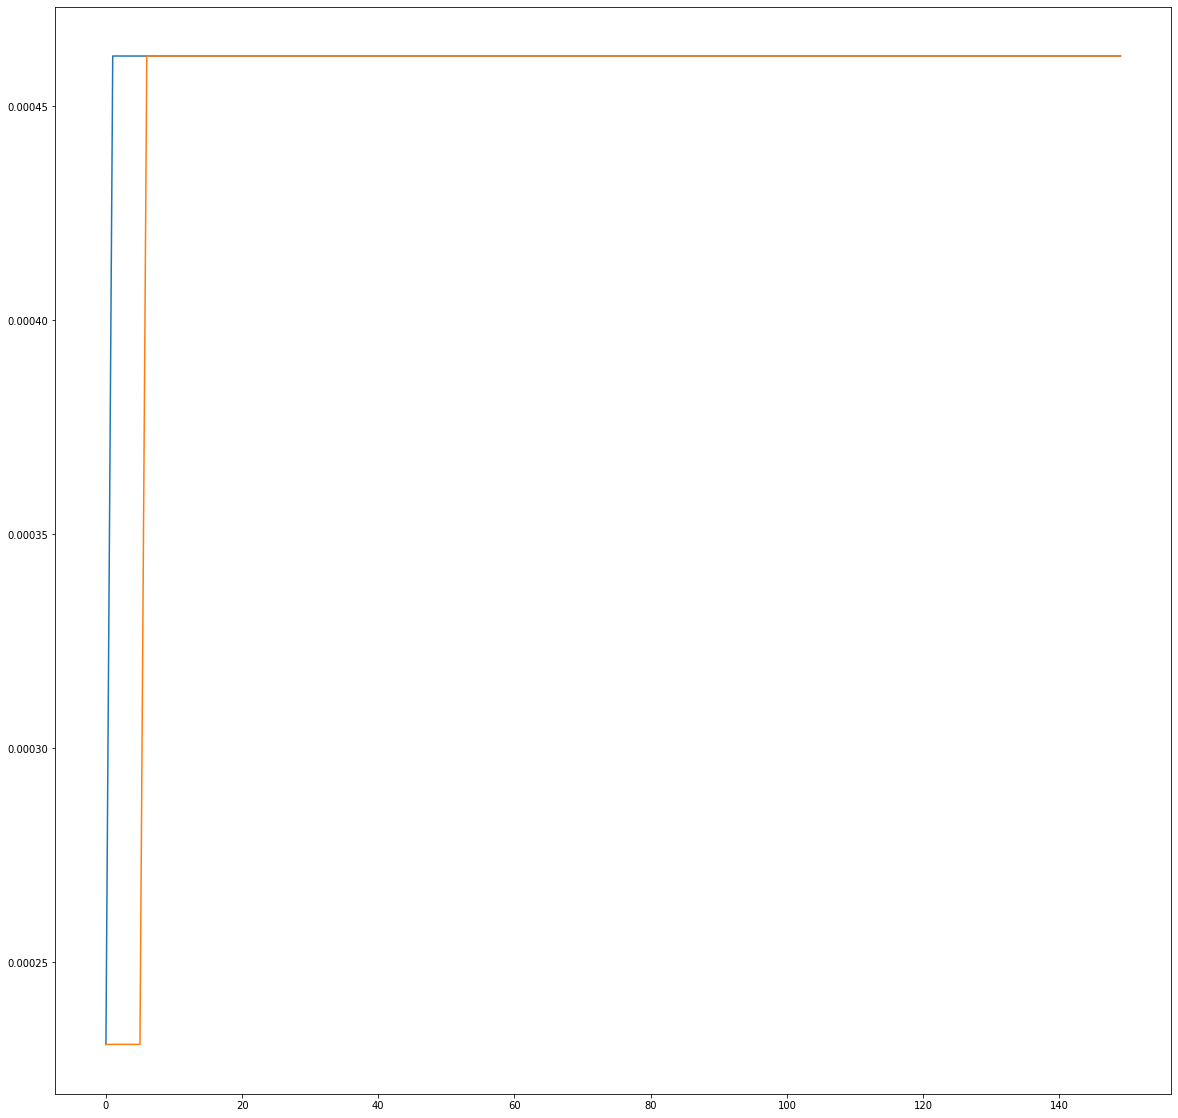

In [25]:
plt.figure(figsize=(20,20))
plt.plot(hist_1.history['accuracy'], label='loss')
plt.plot(hist_2.history['accuracy'], label='loss')

In [22]:
y_data

array([[8000],
       [ 820],
       [7000],
       ...,
       [ 950],
       [3500],
       [1900]])

### notas do modelo

In [21]:
k = x_test.shape[1]
n = len(x_test)


y_predict = modelo_1.predict(x_test)
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 530.507 
MSE = 281437.6757924365 
MAE = 333.93565127724094 
R2 = 0.9760761633170818 
Adjusted R2 = 0.9755928534851036
